# Using Train.csv

In [9]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle


In [10]:
# Load the data to a pandas dataframe

df = pd.read_csv('dataset/train.csv') 


df.shape    # this should the output of row, column

(2190, 13)

In [11]:
df.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [12]:
df.tail()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
2185,2185,361,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,40.0,22.1,1
2186,2186,362,1012.4,17.2,17.3,16.3,15.3,91.0,88.0,0.0,50.0,35.3,1
2187,2187,363,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,40.0,32.9,1
2188,2188,364,1022.3,16.4,15.2,13.8,14.7,92.0,93.0,0.1,40.0,18.0,1
2189,2189,365,1013.8,21.2,19.1,18.0,18.0,89.0,88.0,1.0,70.0,48.0,1


In [13]:
df["day"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [14]:
print("df Info:")
df.info()

df Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.6 KB


In [15]:
df.columns

Index(['id', 'day', 'pressure', 'maxtemp', 'temparature', 'mintemp',
       'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection',
       'windspeed', 'rainfall'],
      dtype='object')

In [16]:
df = pd.DataFrame(data) 

NameError: name 'data' is not defined

In [ ]:
df = df.drop(columns=['day']) 

In [ ]:
print(df)

       id  maxtemp  temparature  mintemp  dewpoint  humidity  cloud  sunshine  \
0    2190     17.5         15.8     12.7      14.9      96.0   99.0       0.0   
1    2191     17.5         16.5     15.8      15.1      97.0   99.0       0.0   
2    2192     11.2         10.4      9.4       8.9      86.0   96.0       0.0   
3    2193     20.6         17.3     15.2       9.5      75.0   45.0       7.1   
4    2194     16.1         13.8      6.4       4.3      68.0   49.0       9.2   
..    ...      ...          ...      ...       ...       ...    ...       ...   
725  2915     18.2         17.6     16.1      13.7      96.0   95.0       0.0   
726  2916     23.2         18.1     16.0      16.0      78.0   80.0       1.6   
727  2917     21.0         18.5     17.0      15.5      92.0   96.0       0.0   
728  2918     21.0         20.0     19.7      19.8      94.0   93.0       0.0   
729  2919     22.2         18.8     17.0      13.3      79.0   89.0       0.2   

     winddirection  windspe

In [ ]:
# checking the number of missing values

df.isnull().sum()

id               0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    1
windspeed        0
dtype: int64

In [ ]:
#handling missing values
df["winddirection"].unique()

df["winddirection"] = df["winddirection"].fillna(df["winddirection"].mode()[0])
df["windspeed"] = df["windspeed"].fillna(df["windspeed"].median())

In [ ]:
print(df.isnull().sum())

id               0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
dtype: int64


In [ ]:
df["rainfall"].unique()

array([1, 0])

In [ ]:
print(df.columns)

Index(['id', 'day', 'pressure', 'maxtemp', 'temparature', 'mintemp',
       'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection',
       'windspeed', 'rainfall'],
      dtype='object')


In [ ]:
df.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


# Exploratory Data Analysis (EDA)

![alt text](explain.png "Title")

![alt text](explain1.png "Title")

In [ ]:
df.shape

(2190, 13)

In [ ]:
sns.set(style="whitegrid")   #setting plot style for all the plots

df.describe()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,1094.500000,179.948402,1013.602146,26.365799,23.953059,22.170091,20.454566,82.036530,75.721918,3.744429,104.863151,21.804703,0.753425
std,632.342866,105.203592,5.655366,5.654330,5.222410,5.059120,5.288406,7.800654,18.026498,3.626327,80.002416,9.898659,0.431116
min,0.000000,1.000000,999.000000,10.400000,7.400000,4.000000,-0.300000,39.000000,2.000000,0.000000,10.000000,4.400000,0.000000
25%,547.250000,89.000000,1008.600000,21.300000,19.300000,17.700000,16.800000,77.000000,69.000000,0.400000,40.000000,14.125000,1.000000
50%,1094.500000,178.500000,1013.000000,27.800000,25.500000,23.850000,22.150000,82.000000,83.000000,2.400000,70.000000,20.500000,1.000000
75%,1641.750000,270.000000,1017.775000,31.200000,28.400000,26.400000,25.000000,88.000000,88.000000,6.800000,200.000000,27.900000,1.000000
max,2189.000000,365.000000,1034.600000,36.000000,31.500000,29.800000,26.700000,98.000000,100.000000,12.100000,300.000000,59.500000,1.000000


In [ ]:
df.columns

Index(['id', 'day', 'pressure', 'maxtemp', 'temparature', 'mintemp',
       'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection',
       'windspeed', 'rainfall'],
      dtype='object')

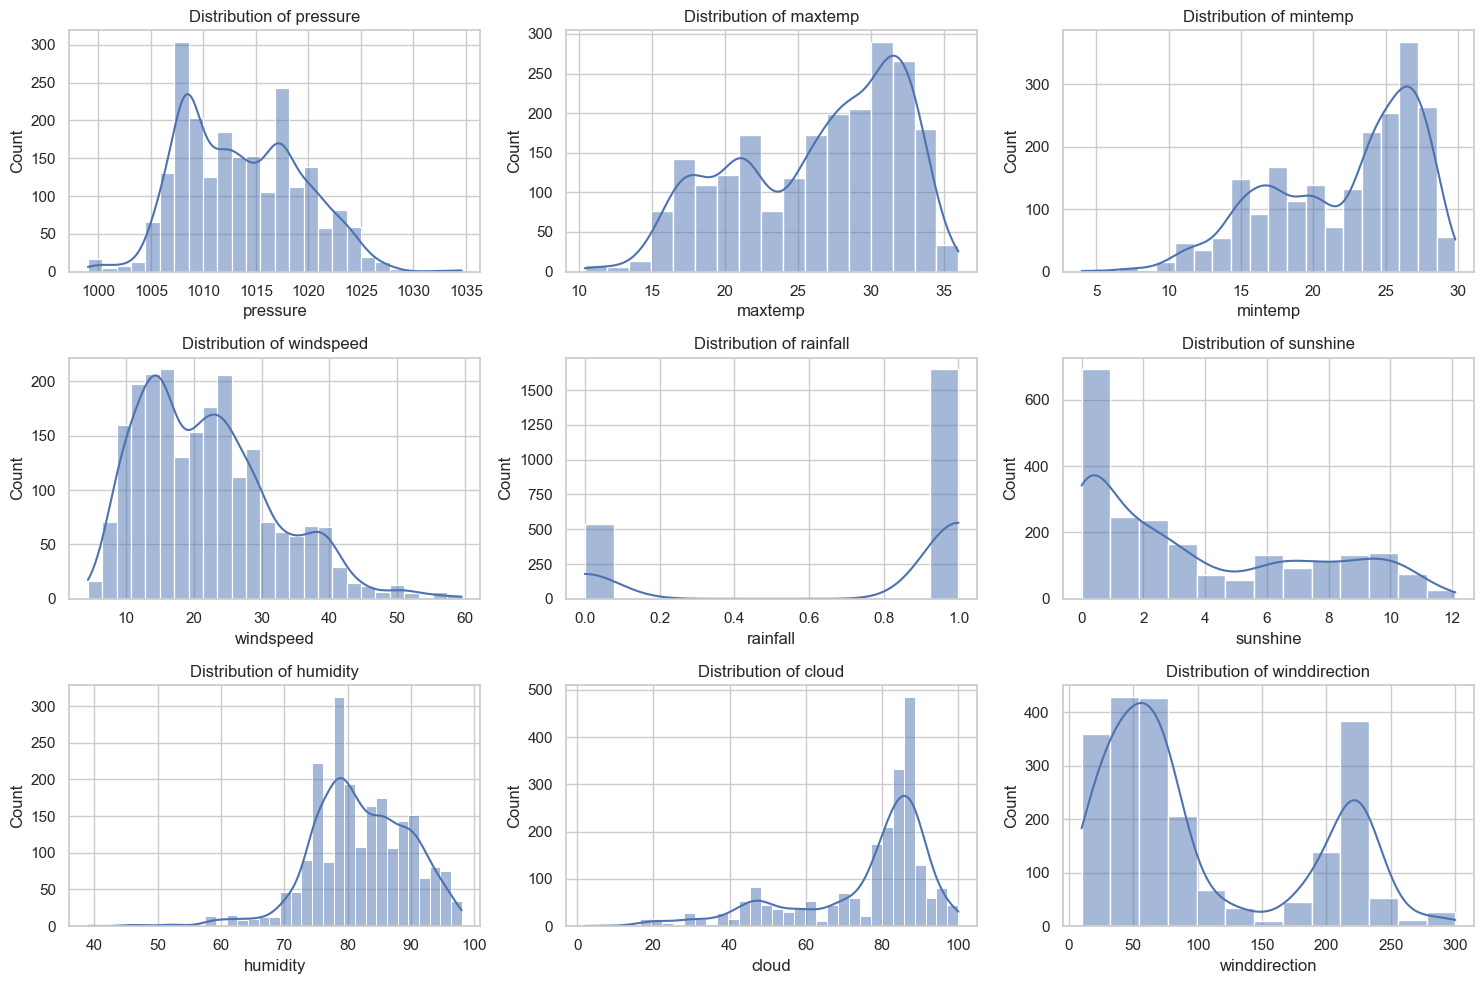

In [ ]:
# Adjust the figure size
plt.figure(figsize=(15, 10))

# List of columns to plot
columns = ['pressure', 'maxtemp', 'mintemp', 'windspeed', 'rainfall', 'sunshine', 'humidity', 'cloud', 'winddirection']

# Adjust the grid layout to match the number of columns
for i, column in enumerate(columns, 1):
    plt.subplot(3, 3, i)  # 3x3 grid layout for 9 plots
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}")

# Adjust subplots to fit into the figure area
plt.tight_layout()
plt.show()

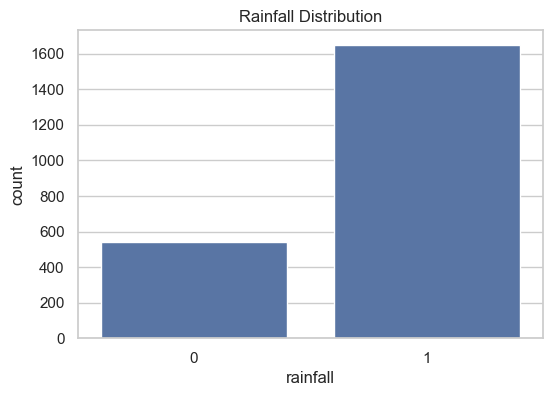

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='rainfall', data=df)
plt.title('Rainfall Distribution')
plt.show()

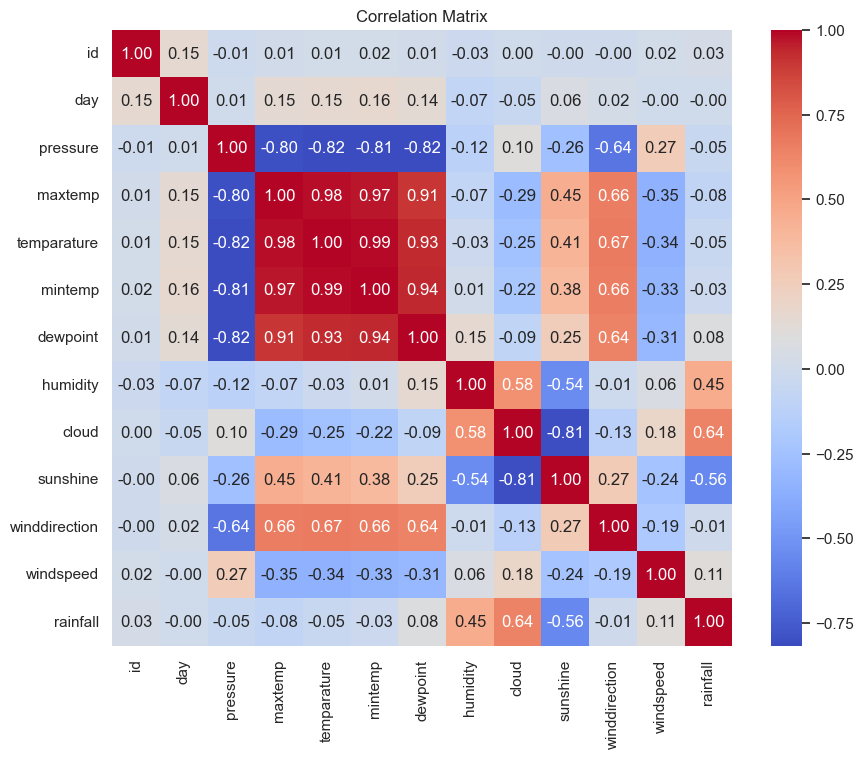

In [ ]:
# ploting correlaton matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt = ".2f")
plt.title('Correlation Matrix')
plt.show()


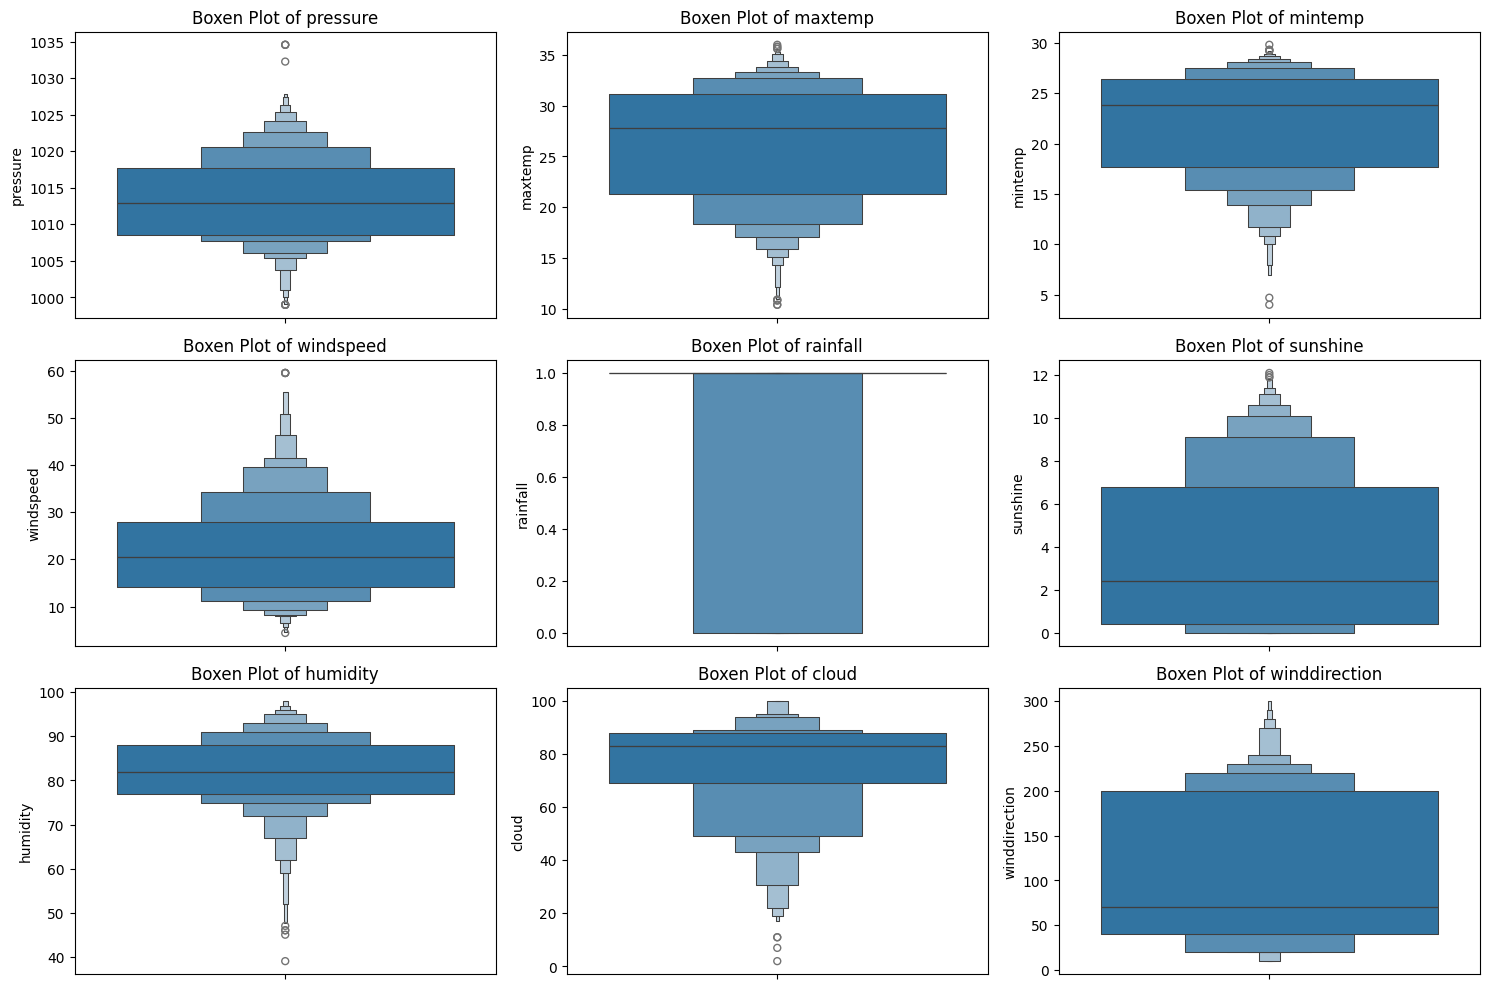

In [17]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(['pressure', 'maxtemp', 'mintemp', 'windspeed', 'rainfall', 'sunshine', 'humidity', 'cloud', 'winddirection'], 1):
    plt.subplot(3, 3, i)
    sns.boxenplot(df[column])
    plt.title(f"Boxen Plot of {column}")


plt.tight_layout()
plt.show()




# Data Preprocessing

In [ ]:
# Drop highly correlated columns

df = df.drop(columns=['maxtemp', 'mintemp'])

In [19]:
df.head() 

,id,day,pressure,temparature,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,20.6,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.9,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,16.1,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,17.8,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,18.4,9.6,52.0,45.0,3.6,40.0,24.8,0


In [21]:
df["rainfall"].value_counts()

rainfall
1    1650
0     540
Name: count, dtype: int64

In [23]:
# seperate majority and minority classes
df_majority = df[df.rainfall==1]
df_minority = df[df.rainfall==0]

print(df_majority.shape)
print(df_minority.shape)

(1650, 11)
(540, 11)


In [28]:
# downsample majority class to match minority count

df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)

df_majority_downsampled.shape

(540, 11)

In [30]:
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

df_downsampled.shape

(1080, 11)

In [31]:
df_downsampled.head()


,id,day,pressure,temparature,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
658,658,294,1017.8,24.7,21.8,85.0,88.0,2.7,50.0,39.5,1
87,87,88,1012.2,25.9,22.6,86.0,84.0,1.6,70.0,17.5,1
1237,1237,143,1006.5,30.0,25.0,69.0,70.0,6.9,220.0,23.9,1
657,657,293,1012.6,26.5,21.3,84.0,72.0,6.6,30.0,25.0,1
28,28,29,1019.9,20.9,17.3,86.0,79.0,0.6,50.0,21.4,1


In [33]:
# shuffle the final dataframe

df_downsampled = df_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)

In [34]:
df_downsampled.head() 

,id,day,pressure,temparature,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,139,140,1008.0,29.9,26.7,89.0,74.0,6.1,230.0,15.8,1
1,35,36,1023.1,17.1,9.5,78.0,89.0,0.0,50.0,28.4,0
2,746,17,1021.5,8.5,2.0,75.0,69.0,4.3,20.0,19.8,0
3,213,214,1008.4,30.4,25.2,74.0,43.0,10.0,300.0,13.8,0
4,2042,218,1008.5,29.0,23.3,74.0,32.0,10.2,50.0,22.8,0


In [35]:
df_downsampled["rainfall"].value_counts()


rainfall
1    540
0    540
Name: count, dtype: int64

In [38]:
x = df_downsampled.drop(columns=['rainfall'])
y = df_downsampled['rainfall']

print(x) 


        id  day  pressure  temparature  dewpoint  humidity  cloud  sunshine  \
0      139  140    1008.0         29.9      26.7      89.0   74.0       6.1   
1       35   36    1023.1         17.1       9.5      78.0   89.0       0.0   
2      746   17    1021.5          8.5       2.0      75.0   69.0       4.3   
3      213  214    1008.4         30.4      25.2      74.0   43.0      10.0   
4     2042  218    1008.5         29.0      23.3      74.0   32.0      10.2   
...    ...  ...       ...          ...       ...       ...    ...       ...   
1075   418   54    1017.8         16.6      15.5      95.0  100.0       0.0   
1076  1694  235    1011.1         26.7      23.3      79.0   78.0       4.6   
1077  1482   23    1018.7         13.1      12.3      95.0   87.0       0.3   
1078  2014  190    1005.6         29.1      25.8      74.0   72.0      11.8   
1079  1258  164    1008.5         30.8      25.9      75.0   32.0       9.5   

      winddirection  windspeed  
0             230.

In [39]:
print(y) 

0       1
1       0
2       0
3       0
4       0
       ..
1075    1
1076    1
1077    1
1078    0
1079    0
Name: rainfall, Length: 1080, dtype: int64


In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)